# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

In [11]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [12]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


### Analysis of Facebook Wiki

In [13]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [14]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [15]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [16]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

In [17]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [18]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


### Analysis of Fitocracy

In [19]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [20]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [21]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

In [22]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

In [23]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

### Analysis of Reddit

In [24]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [25]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [26]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [27]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

In [28]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

In [29]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
reddit_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M                              1045003
           M                     80705
           W                     22883
W                               275287
           M                     21825
           W                      7809
Name: responder_gender, dtype: int64

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [30]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


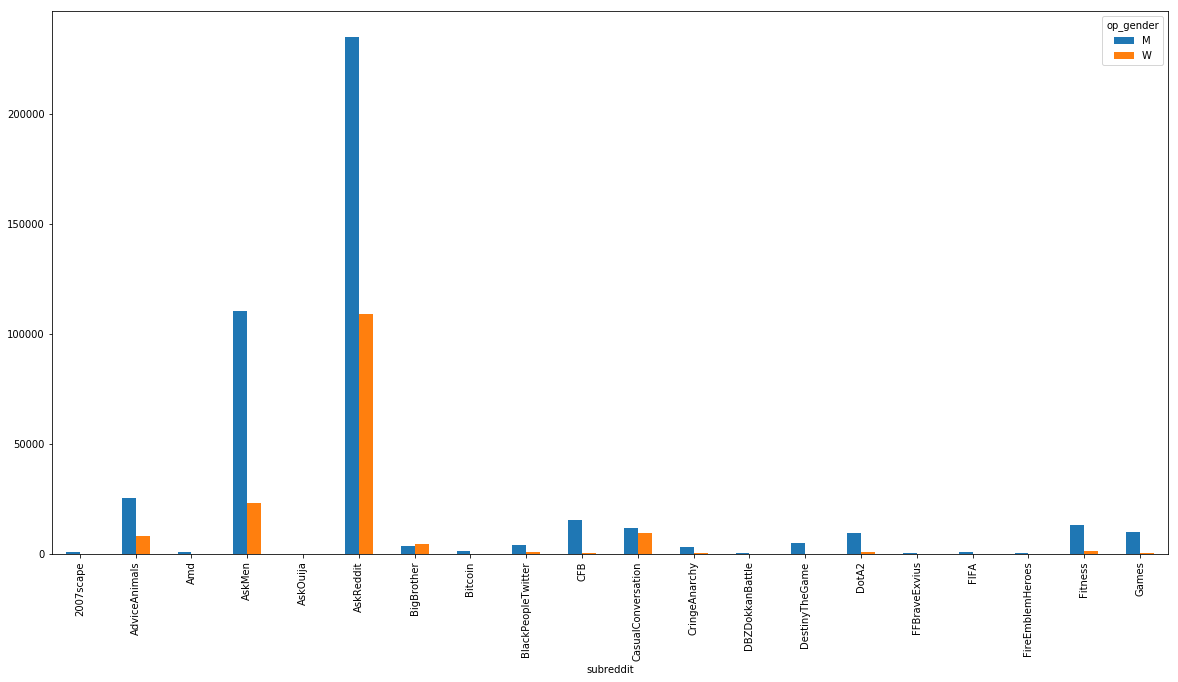

In [31]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [32]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

### Analysis of TED

In [33]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [34]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [36]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [56]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [49]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# should I do a stratified sample?
fb_congress_sample = fb_congress_df.sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
140,3,video,57265377,Roger Williams,Congress_Republican,M,Sherry,Since President Donald J. Trump was sworn in o...,Yes we will!!
509,18,video,57265377,Roger Williams,Congress_Republican,M,Stephen,It's time to put Obama in the history books. W...,"""He likes to say he is a historical figure"". W..."
729,19,video,57265377,Roger Williams,Congress_Republican,M,Diane,"Since its inception, Obamacare has been an abs...","I do not agree, and I consider the push to rep..."
743,19,video,57265377,Roger Williams,Congress_Republican,M,Josh,"Since its inception, Obamacare has been an abs...","Rep Williams, you couldn't be more incorrect a..."
786,19,video,57265377,Roger Williams,Congress_Republican,M,Laura,"Since its inception, Obamacare has been an abs...",I disagree. Health care is a basic human right...


In [50]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      17073
photo     14614
status     9548
video      8655
event        84
note         15
music        11
Name: post_type, dtype: int64
Congress_Republican     31798
Congress_Democratic     17111
Congress_Independent      604
                          487
Name: op_category, dtype: int64
M    37487
W    12513
Name: op_gender, dtype: int64


In [60]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [61]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
140,3,video,57265377,Roger Williams,Congress_Republican,M,Sherry,Since President Donald J. Trump was sworn in o...,Yes we will!!,"[Since, President, Donald, J., Trump, was, swo...","[Yes, we, will, !, !]",69,5
509,18,video,57265377,Roger Williams,Congress_Republican,M,Stephen,It's time to put Obama in the history books. W...,"""He likes to say he is a historical figure"". W...","[It, 's, time, to, put, Obama, in, the, histor...","[``, He, likes, to, say, he, is, a, historical...",37,19
729,19,video,57265377,Roger Williams,Congress_Republican,M,Diane,"Since its inception, Obamacare has been an abs...","I do not agree, and I consider the push to rep...","[Since, its, inception, ,, Obamacare, has, bee...","[I, do, not, agree, ,, and, I, consider, the, ...",28,141
743,19,video,57265377,Roger Williams,Congress_Republican,M,Josh,"Since its inception, Obamacare has been an abs...","Rep Williams, you couldn't be more incorrect a...","[Since, its, inception, ,, Obamacare, has, bee...","[Rep, Williams, ,, you, could, n't, be, more, ...",28,61
786,19,video,57265377,Roger Williams,Congress_Republican,M,Laura,"Since its inception, Obamacare has been an abs...",I disagree. Health care is a basic human right...,"[Since, its, inception, ,, Obamacare, has, bee...","[I, disagree, ., Health, care, is, a, basic, h...",28,24


### Facebook Wiki linguistic analysis

In [62]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [ ]:
# still too large for my analysis, let's reduce to 50,000 again
